# ***Predicting the GENRE Of The Movie

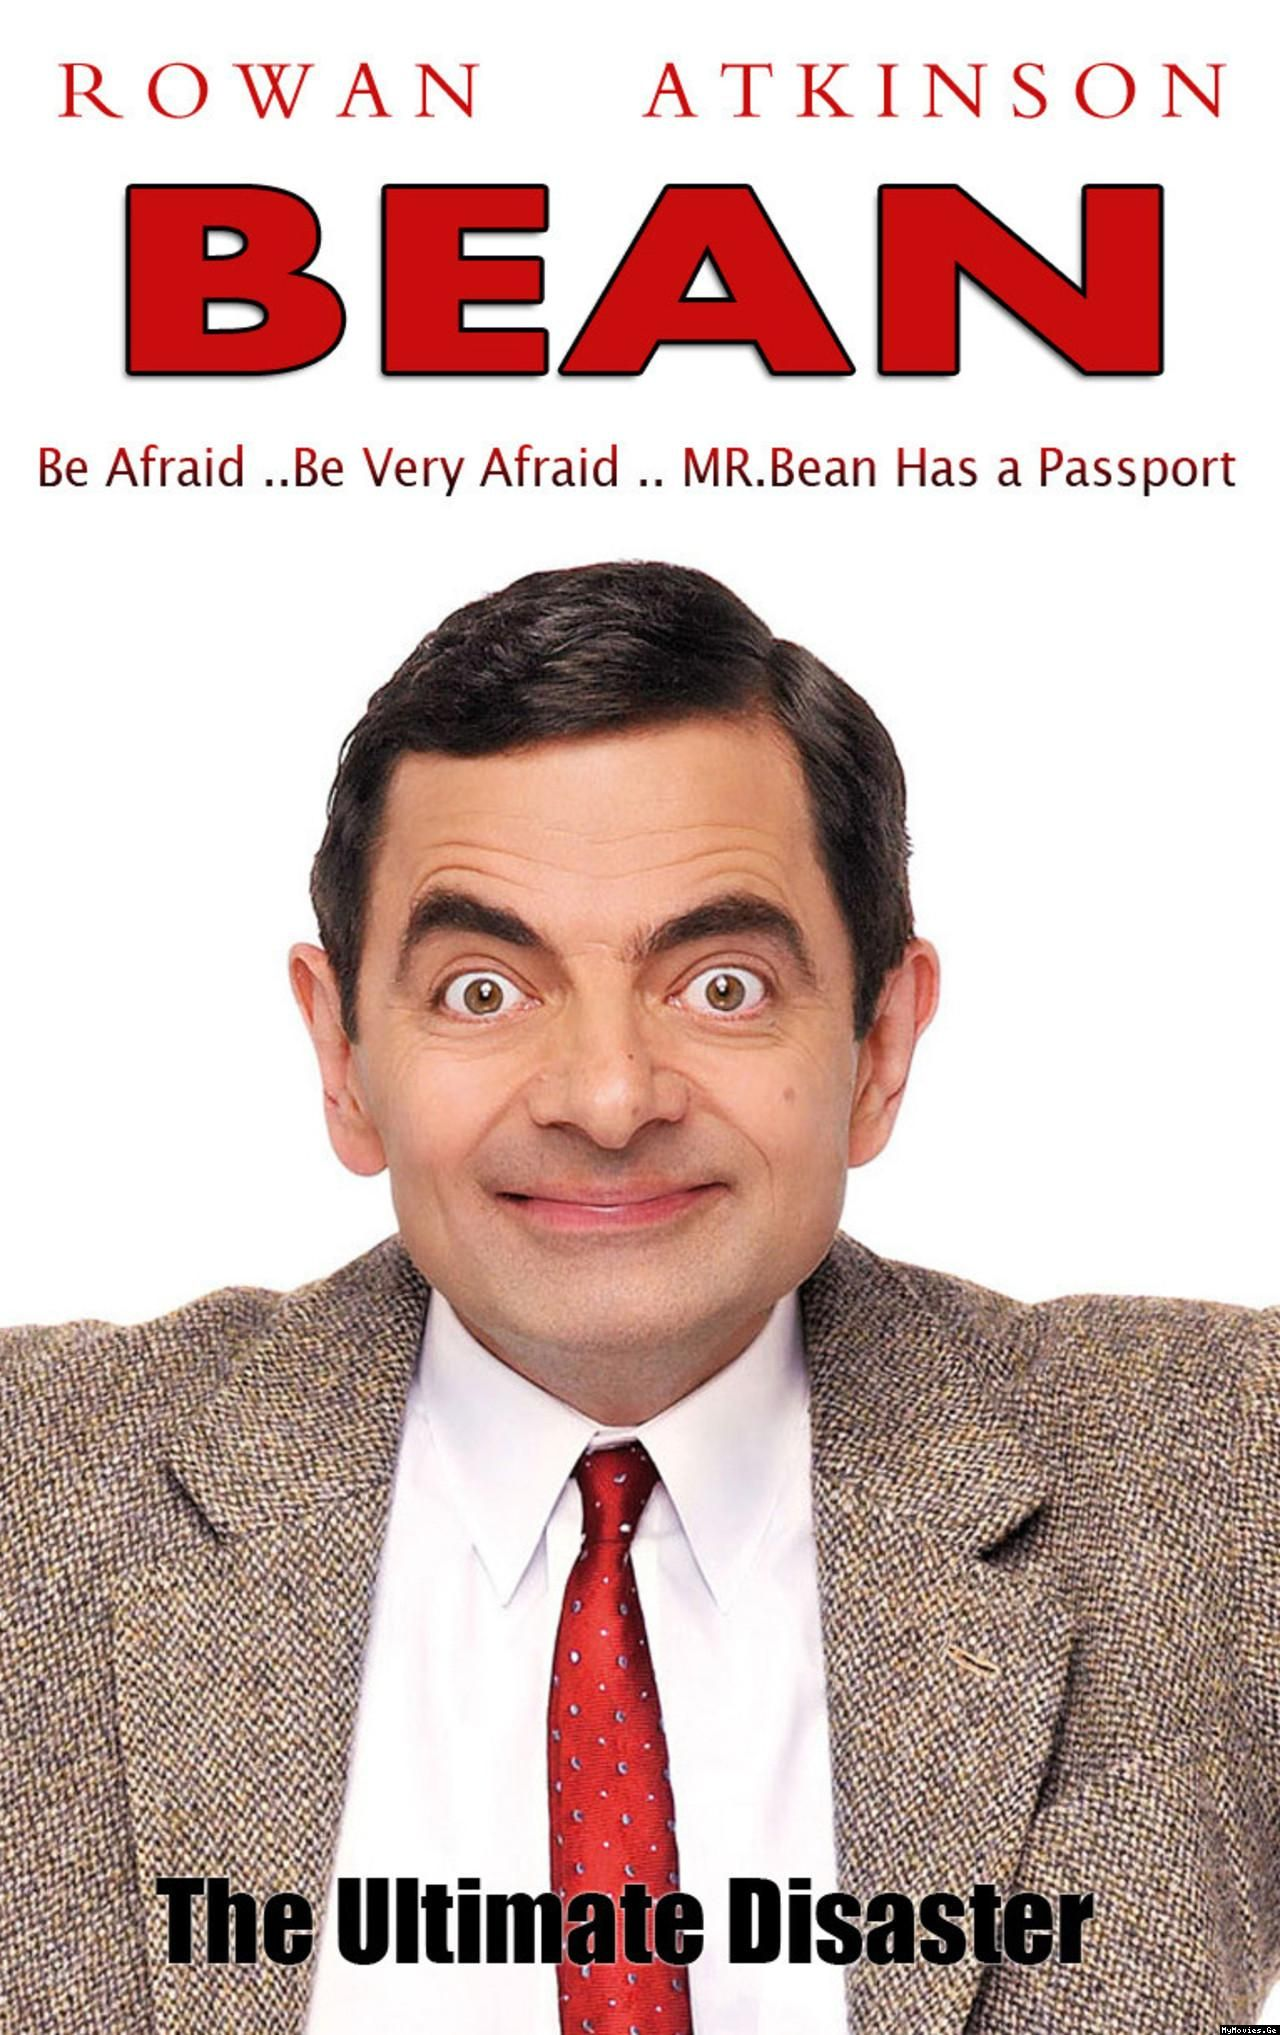

In [15]:
COMEDY_MOVIE 

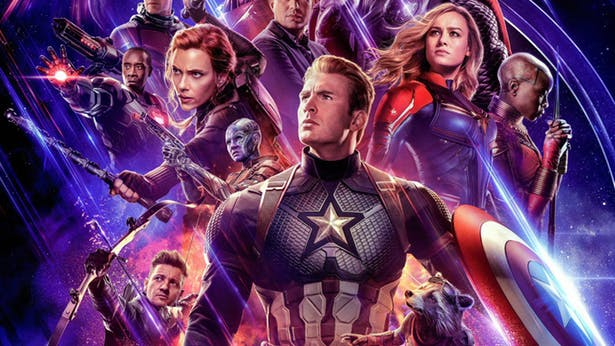

In [19]:
SuperNatural_Action_thriller

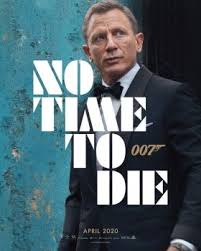

In [20]:
Action_Romantic_Thriller

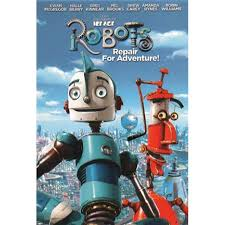

In [22]:
Animated_movie

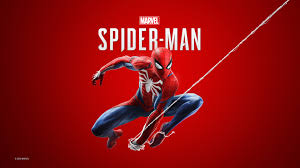

In [24]:
Action_Adventure

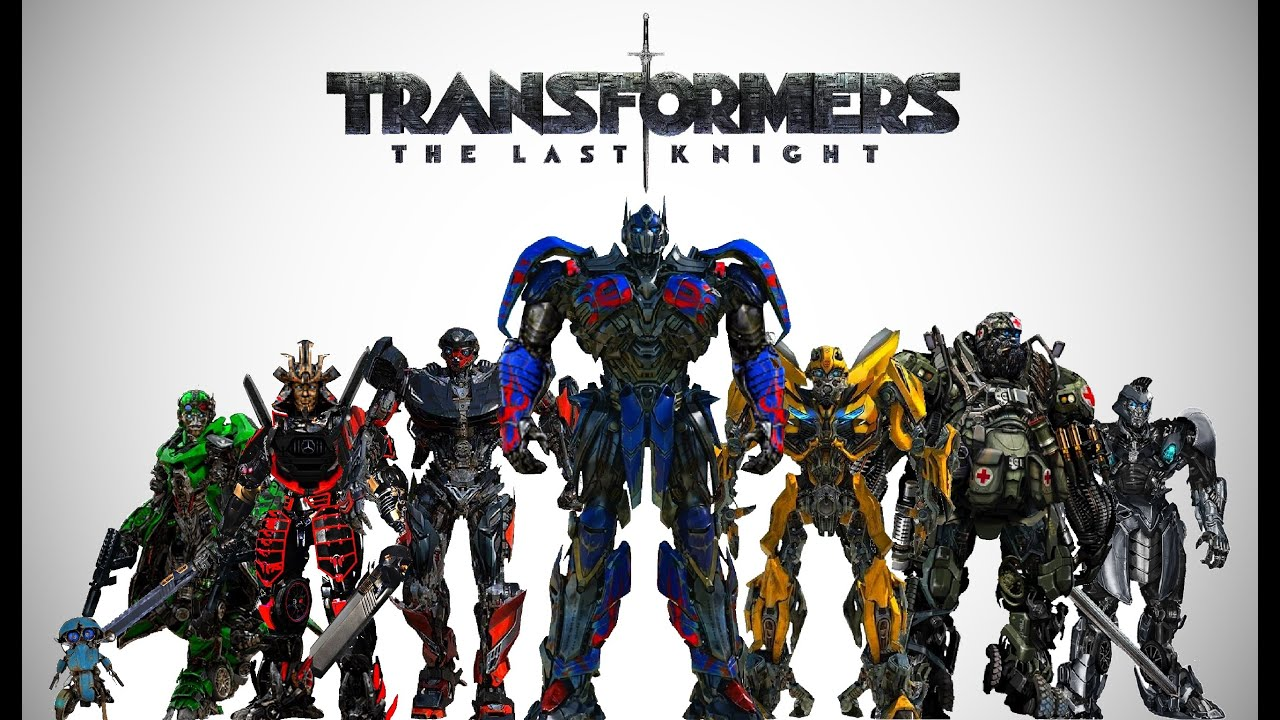

In [26]:
science_fiction_movie

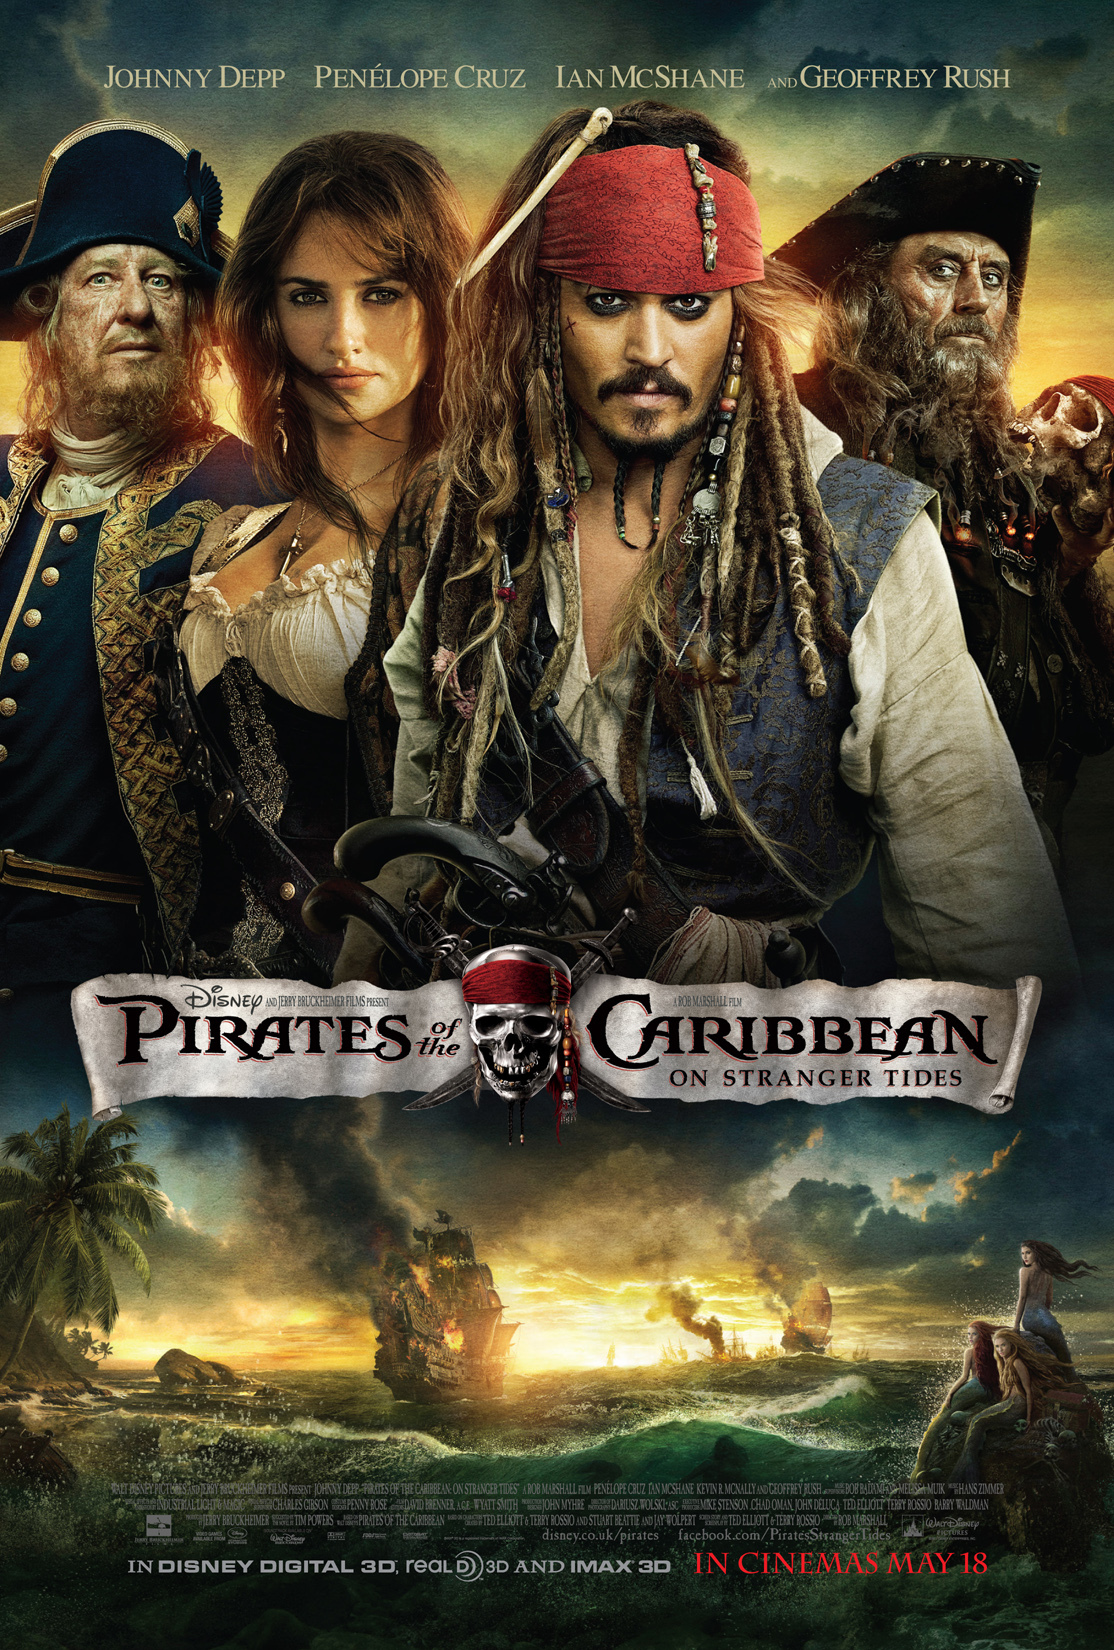

In [28]:
fantacy_movie

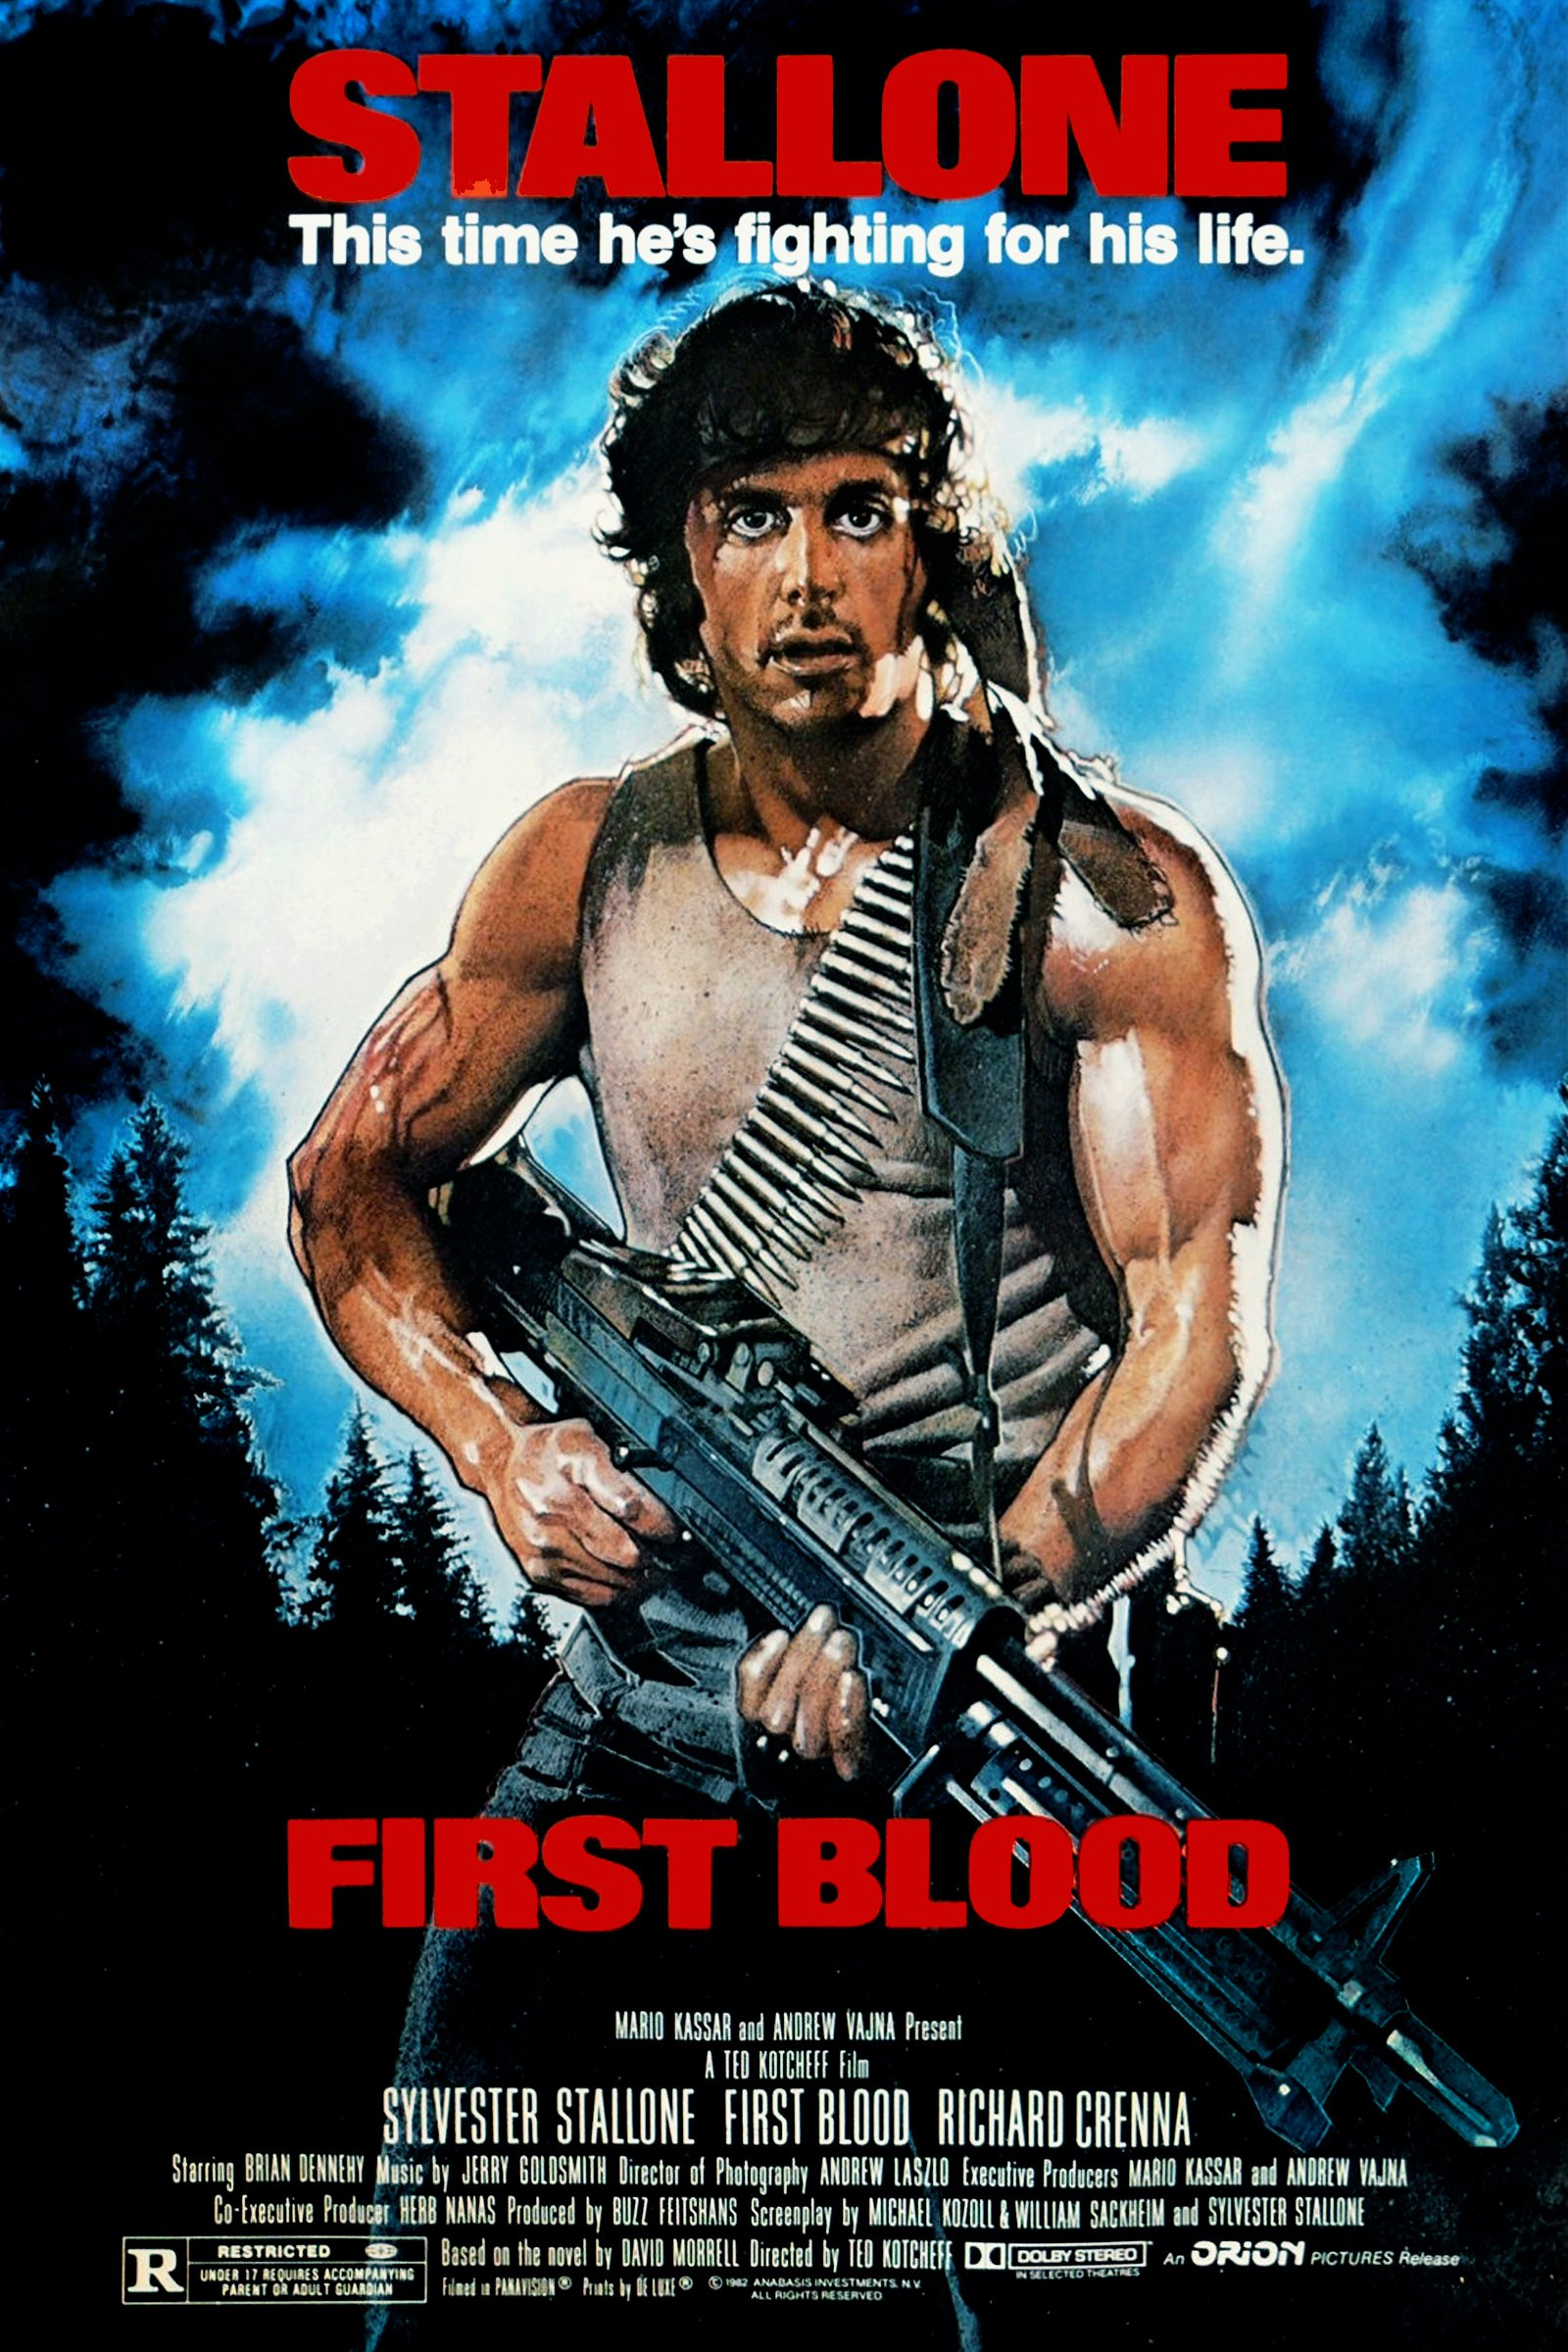

In [29]:
Action_movie

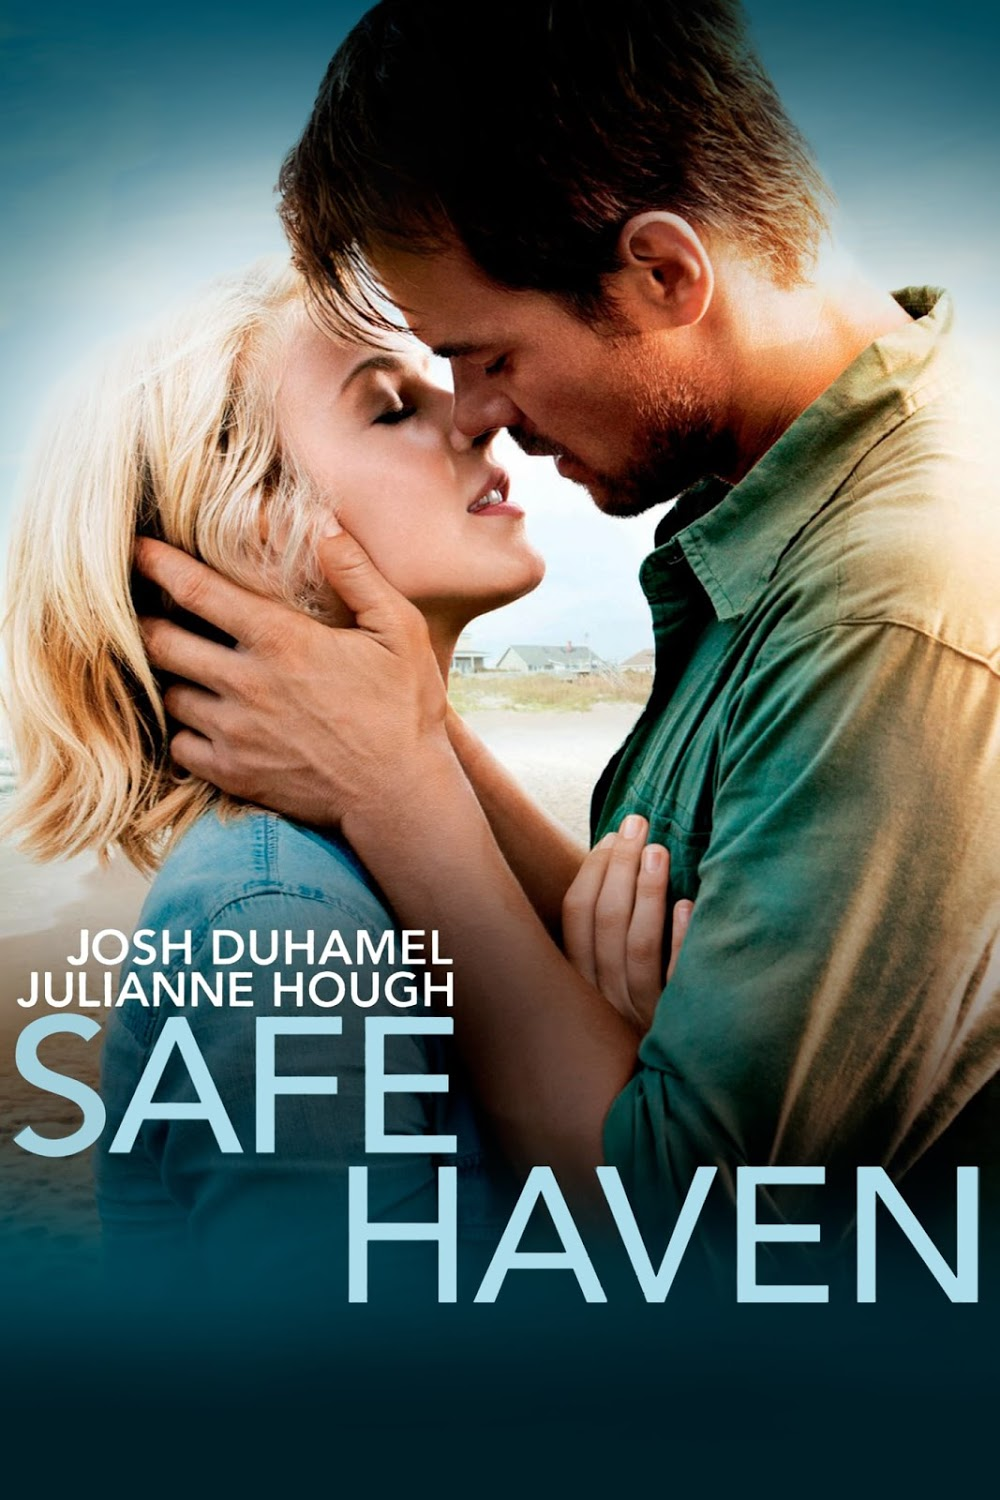

In [31]:
Romantic_movie

### * We have to predict the of the movie Genre based on title, tagline, original_title and overview fields.

### * In general,  we predict total collections, hit or flop, which might be a Regression And Classification Problem

### * Here we have to predict the Genre of the movie which is very complicated because each record is having multiple outputs and target column is having multiple classes.

### *This is an interesting problem in machine learning combining text analysis and multilabel prediction.

### *Multilabel classification is also a rich area of research. While some models can natively handle multiple labels (like random forests) most need adaptation.



### The outline is as follows:
### 1.The data is imported and prepared for analysis.
### 2.The features are analysed and appropriate choices made to improve the fit.
### 3.Genre column is changed.
### 4.converting words to vectors by applying vectorization method.
### 5.Test set result of final model.
### 6.A short discussion on future work.

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns' , 100)
pd.set_option('display.max_rows' , 100)

In [0]:
import os
os.chdir("/content/drive/My Drive/movie data set")

In [0]:
data=pd.read_csv("moviesdatase.csv")

### * We are taking the following required columns only for analysis.

In [0]:
final_data2=pd.read_csv("moviesdatase.csv",usecols=["tagline","title","original_title","overview","genres"])

In [0]:
final_data2.head(5)

,genres,original_title,overview,tagline,title
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale
4,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II


### * We are having about 45,000 records when we are using it directly we had issues with RAM as data was huge because we have to countvectorize all the words for all the plot overview resulting it to crash. So I have choosen to use only 20000 records after trying with 30000 and 25000 records respectively.

### * This is because in Movie Summary we will be having so many so words and we for model building we need to convert them into numeric of vector form then we will face the problem of dimensionality and more over computational problem is also there.

In [0]:
final_data=final_data2.iloc[range(20000),:]

In [0]:
def summary(final_data):
    print('Shape of data :' ,final_data.shape )
    return(pd.DataFrame({"Datatype":final_data.dtypes ,
                          "NAs":final_data.isnull().sum() , 
                           "Uniques":final_data.nunique(),
                           "levels": [final_data[x].unique() for x in final_data.columns]}))

In [0]:
summary(final_data)

Shape of data : (20000, 5)


,Datatype,NAs,Uniques,levels
genres,object,0,2570,"[[{'id': 16, 'name': 'Animation'}, {'id': 35, ..."
original_title,object,0,19334,"[Toy Story, Jumanji, Grumpier Old Men, Waiting..."
overview,object,135,19820,"[Led by Woody, Andy's toys live happily in his..."
tagline,object,8294,11665,"[nan, Roll the dice and unleash the excitement..."
title,object,2,19098,"[Toy Story, Jumanji, Grumpier Old Men, Waiting..."


In [0]:
final_data.to_csv("moviesdatase.csv",index=False)

In [0]:
final_data["genres"][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

## *We have to do some preprocessing steps for text data.


### 1. Converting Paragraphs into sentences
### 2. Converting sentences into paragraphs called Tokenization
### 3. Converting into Lower Case.
### 4. Removing Puntuations
### 5. Removing White Spaces
### 6. Removing Stop Words
### 7. Lemmatization

### *Stop Words are those which do not have any individual meaning

### * These are the words which are not considered by the search enegine also.

### * In data pre-processing mainly in NLP we have 2 steps Stemming and Lemmatization. Stemming is cutting of Prefix or suffix Word some times it may not have any meaning also. In Lemmatization is also chopping of words and it will be having meaning also but computationally we need so much power so we use Stemming.

### * Some of the NLP Libraries we are using
### 1.NLTK
### 2.Spacy
### 3.Scikit-Learn
### 4.Gensim

In [0]:
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import ast
from ast import literal_eval

### * In genre column we are having keys and values in the form of a Dictionary so we have  extracted only the values because we dont use keys, Keys are just the representation of keys.

In [0]:

final_data['modified_genres'] =final_data['genres'].apply(lambda x:[genre['name'] for genre in literal_eval(x)])
final_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,genres,original_title,overview,tagline,title,modified_genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their diffe...",NaN,Toy Story,"[Animation, Comedy, Family]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all ...",Roll the dice and unleash the excitement!,Jumanji,"[Adventure, Fantasy, Family]"
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in ...",Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,"[Romance, Comedy]"
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild...",Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,Father of the Bride Part II,[Comedy]


In [0]:
final_data.drop("genres",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
final_data.head()

,original_title,overview,tagline,title,modified_genres
0,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their diffe...",NaN,Toy Story,"[Animation, Comedy, Family]"
1,Jumanji,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all ...",Roll the dice and unleash the excitement!,Jumanji,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in ...",Still Yelling. Still Fighting. Still Ready for Love.,Grumpier Old Men,"[Romance, Comedy]"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, Glo and Robin talk it all out, determined to find a better way to breathe.",Friends are the people who let you be yourself... and never let you forget it.,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild...",Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,Father of the Bride Part II,[Comedy]



## *Creating Y variables - Dealing with multi labels
### *It seems that choosing genre data is a complicated process as some movies have multiple genres associated. In order for our model to train and predict from one genre per each observation, we duplicated movie data for each genre. So if a movie has two genres, we will have an observation for each genre

In [0]:
from itertools import combinations, permutations

In [0]:
final_data['pairs_genre'] = final_data.modified_genres.map(lambda x : list(combinations(x, 2)))
final_data['uni_genre'] = final_data.modified_genres.map(lambda x : list(combinations(x, 1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### *Here we are creating a unique column, each record having multiple column will created as a seperate list.

In [0]:

melted_uni_genre = pd.DataFrame(pd.concat([pd.Series(row['original_title'], row['uni_genre']) for x, 
                                           row in final_data.iterrows()])).reset_index()

In [0]:

melted_uni_genre.columns = ['uni_genre', 'original_title']

### *Here we are Creating a pair genre column where a pair of genres will be in the list.

In [0]:
melted_pairs_genre = pd.DataFrame(pd.concat([pd.Series(row['original_title'], row['pairs_genre']) for x, 
                                             row in final_data.iterrows()])).reset_index()

In [0]:
melted_pairs_genre.columns = ['pairs_genre', 'original_title']

In [0]:
melted_pairs_genre.head()

,pairs_genre,original_title
0,"(Animation, Comedy)",Toy Story
1,"(Animation, Family)",Toy Story
2,"(Comedy, Family)",Toy Story
3,"(Adventure, Fantasy)",Jumanji
4,"(Adventure, Family)",Jumanji


In [0]:
melted_uni_genre.head()

,uni_genre,original_title
0,"(Animation,)",Toy Story
1,"(Comedy,)",Toy Story
2,"(Family,)",Toy Story
3,"(Adventure,)",Jumanji
4,"(Fantasy,)",Jumanji


In [0]:
from collections import Counter

### * Here we can get a list of how many times genre had appeared in the total record.

In [0]:
Counter(melted_uni_genre.uni_genre)

Counter({('Action',): 3341,
         ('Adventure',): 1846,
         ('Animation',): 624,
         ('Carousel Productions',): 1,
         ('Comedy',): 6372,
         ('Crime',): 2329,
         ('Documentary',): 1294,
         ('Drama',): 10606,
         ('Family',): 1261,
         ('Fantasy',): 1139,
         ('Foreign',): 755,
         ('History',): 757,
         ('Horror',): 2023,
         ('Music',): 878,
         ('Mystery',): 1255,
         ('Romance',): 3938,
         ('Science Fiction',): 1423,
         ('TV Movie',): 140,
         ('Telescene Film Group Productions',): 1,
         ('Thriller',): 3880,
         ('Vision View Entertainment',): 1,
         ('War',): 736,
         ('Western',): 514})

### * Here we are having a list how many times pair of genres have appeared in the list.

In [0]:
Counter(melted_pairs_genre.pairs_genre)

Counter({('Action', 'Adventure'): 768,
         ('Action', 'Animation'): 70,
         ('Action', 'Comedy'): 738,
         ('Action', 'Crime'): 706,
         ('Action', 'Documentary'): 12,
         ('Action', 'Drama'): 925,
         ('Action', 'Family'): 142,
         ('Action', 'Fantasy'): 146,
         ('Action', 'Foreign'): 108,
         ('Action', 'History'): 129,
         ('Action', 'Horror'): 144,
         ('Action', 'Music'): 23,
         ('Action', 'Mystery'): 137,
         ('Action', 'Romance'): 228,
         ('Action', 'Science Fiction'): 447,
         ('Action', 'TV Movie'): 10,
         ('Action', 'Thriller'): 1267,
         ('Action', 'War'): 155,
         ('Action', 'Western'): 206,
         ('Adventure', 'Action'): 270,
         ('Adventure', 'Animation'): 122,
         ('Adventure', 'Comedy'): 391,
         ('Adventure', 'Crime'): 137,
         ('Adventure', 'Documentary'): 8,
         ('Adventure', 'Drama'): 555,
         ('Adventure', 'Family'): 312,
         ('Adventu

In [0]:
final_data.columns

Index(['original_title', 'overview', 'tagline', 'title', 'modified_genres',
       'pairs_genre', 'uni_genre'],
      dtype='object')

### * Here we have merged the final data with Data frame having Unique genres and pair of geners.

In [0]:

merged_mdb_uni = pd.merge(melted_uni_genre,final_data , how ='left', on = 'original_title');

In [0]:
merged_mdb_pair = pd.merge(melted_pairs_genre, final_data , how ='left', on = 'original_title')

In [0]:

merged_mdb_uni.shape, merged_mdb_pair.shape

((48961, 8), (44951, 8))

In [0]:
merged_mdb_uni.columns

Index(['uni_genre_x', 'original_title', 'overview', 'tagline', 'title',
       'modified_genres', 'pairs_genre', 'uni_genre_y'],
      dtype='object')

In [0]:
merged_mdb_pair.columns

Index(['pairs_genre_x', 'original_title', 'overview', 'tagline', 'title',
       'modified_genres', 'pairs_genre_y', 'uni_genre'],
      dtype='object')

In [0]:
merged_mdb_uni.head(1)

,uni_genre_x,original_title,overview,tagline,title,modified_genres,pairs_genre,uni_genre_y
0,"(Animation,)",Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their diffe...",NaN,Toy Story,"[Animation, Comedy, Family]","[(Animation, Comedy), (Animation, Family), (Comedy, Family)]","[(Animation,), (Comedy,), (Family,)]"


### * Here we have converted "Unique Genre" column  into categorical because we are applying label encoing to converting into numeric form.

In [0]:
merged_mdb_uni["uni_genre_x"]=merged_mdb_uni["uni_genre_x"].astype("str").astype("category")

### Label Encoding for the Unique Genre column

In [0]:
#Encode
merged_mdb_uni2 = merged_mdb_uni

#Convert Y variable to numerical value prior to modelling
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(merged_mdb_uni2['uni_genre_x'])
merged_mdb_uni2['uni_genre_x'] = le.transform(merged_mdb_uni2['uni_genre_x'])

In [0]:
merged_mdb_uni2.head(1)

,uni_genre_x,original_title,overview,tagline,title,modified_genres,pairs_genre,uni_genre_y
0,2,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their diffe...",NaN,Toy Story,"[Animation, Comedy, Family]","[(Animation, Comedy), (Animation, Family), (Comedy, Family)]","[(Animation,), (Comedy,), (Family,)]"


### *After doing Lemmatization we have to convert Words  into numbers of vector form and for that we are having 2 steps
## 1.Count vectorizer
### 2.TFIDF vectorizer 

### * Count Vectorizer Just counts the words, how many times it had occured where as Tfidf vectorizer counts the number of time word occured and also tells us how significant the word is.

In [0]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stemmer= PorterStemmer()
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### * Here we are Creating a function  for the pr-processing steps mentioned above.

In [0]:
def process(doc):
    import re
    stop=stopwords.words('english')
    doc=re.sub("[\d_]+", " ",doc)
    doc=re.sub("[\W_]+"," ",doc)
    x= word_tokenize(doc)
    x=[i for i in x if len(i)>5]
    stemmed=[stemmer.stem(word) for word in x]
    clean=[word for word in stemmed if not word in stop]
    joined= ' '.join(clean)
    return joined

### * Here we are converting 3 columns in to vector form "overview","Tagline","original_title" because these are the columns in sentence form.

In [0]:
final_data['overview'].fillna(value=np.nan, inplace=True)
print(final_data['overview'])

from sklearn.feature_extraction.text import CountVectorizer

#Overview
vectorizer = CountVectorizer(stop_words='english',decode_error='ignore',analyzer='word', min_df=4,preprocessor=process)

corpus = final_data['overview'].values.astype('U')

wordvec = vectorizer.fit_transform(corpus.ravel())
wordvec = wordvec.toarray()
words = vectorizer.get_feature_names()
print("number of words in plot summary: ", len(words))
overview_db = pd.DataFrame(wordvec,columns=words)

final_data['original_title'].fillna(value=np.nan, inplace=True)
print(final_data['original_title'])

#original_title
vectorizer = CountVectorizer(stop_words='english',decode_error='ignore',analyzer='word', min_df=4,preprocessor=process)

corpus = final_data['original_title'].values.astype('U')

wordvec = vectorizer.fit_transform(corpus.ravel())
wordvec = wordvec.toarray()
words = vectorizer.get_feature_names()
print("number of words in title: ", len(words))
original_title_db = pd.DataFrame(wordvec,columns=words)



final_data['tagline'].fillna(value=np.nan, inplace=True)
print(final_data['tagline'])

#original_title
vectorizer = CountVectorizer(stop_words='english',decode_error='ignore',analyzer='word', min_df=4,preprocessor=process)




corpus = final_data['tagline'].values.astype('U')

wordvec = vectorizer.fit_transform(corpus.ravel())
wordvec = wordvec.toarray()
words = vectorizer.get_feature_names()
print("number of words in tagline: ", len(words))
tagline_db = pd.DataFrame(wordvec,columns=words)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'describ', 'dure', 'elsewher', 'everyon', 'everyth', 'everywher', 'formerli', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noth', 'nowher', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sincer', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi',

0        Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their diffe...
1        When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all ...
2        A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in ...
3                                     Cheated on, mistreated and stepped 

### *Here we are Creating a Data Frame for all the 3 columns that are converted in to vector form


In [0]:

overview_db = pd.DataFrame(overview_db)
original_title_db = pd.DataFrame(original_title_db)
tagline_db=pd.DataFrame(tagline_db)

In [0]:
tagline_db.head()

,abandon,aboard,absolut,academi,accept,accid,acclaim,account,accus,achiev,action,actress,actual,addict,adult,adventur,affair,afraid,africa,afterlif,agent,alcatraz,alien,alreadi,alway,amaz,ambit,america,american,ancient,angel,anim,anoth,answer,anymor,anyon,anyth,anywher,apart,appear,appetit,applaus,arrang,arrest,arriv,arthur,artist,assassin,assembl,assign,...,villag,villain,violenc,violent,virgin,vision,voic,voyag,wait,walk,want,warn,warner,warrior,washington,wast,watch,wealth,weapon,wed,weekend,welcom,western,whatev,wheel,whisper,whodunnit,wick,wilder,wildest,william,win,window,winner,winter,wish,wit,witch,wonder,work,worker,world,worship,write,writer,written,wrong,yellow,yesterday,zombi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
merged_mdb_uni3 = merged_mdb_uni2

In [0]:
merged_mdb_uni3.columns

Index(['uni_genre_x', 'original_title', 'overview', 'tagline', 'title',
       'modified_genres', 'pairs_genre', 'uni_genre_y'],
      dtype='object')

### * We are dropping the columns which we have have already converted into vector form

In [0]:
merged_mdb_uni3 = merged_mdb_uni3.drop(['pairs_genre'], axis=1)
merged_mdb_uni3 = merged_mdb_uni3.drop(['overview'], axis=1)
merged_mdb_uni3 = merged_mdb_uni3.drop(['original_title'], axis=1)

In [0]:
merged_mdb_uni3 = merged_mdb_uni3.drop(['tagline'], axis=1)

In [0]:
merged_mdb_uni3 = merged_mdb_uni3.drop(['title'], axis=1)

In [0]:
merged_mdb_uni3.head()

,uni_genre_x,modified_genres,uni_genre_y
0,2,"[Animation, Comedy, Family]","[(Animation,), (Comedy,), (Family,)]"
1,4,"[Animation, Comedy, Family]","[(Animation,), (Comedy,), (Family,)]"
2,8,"[Animation, Comedy, Family]","[(Animation,), (Comedy,), (Family,)]"
3,1,"[Adventure, Fantasy, Family]","[(Adventure,), (Fantasy,), (Family,)]"
4,9,"[Adventure, Fantasy, Family]","[(Adventure,), (Fantasy,), (Family,)]"


### *We are the  concatinating al the 3 vector converted columns to unique converted Genre column.

In [0]:
merged_mdb_uni3 = pd.concat([merged_mdb_uni3, overview_db], axis=1)


In [0]:
merged_mdb_uni3 = pd.concat([merged_mdb_uni3, original_title_db], axis=1)


In [0]:
merged_mdb_uni3 = pd.concat([merged_mdb_uni3, tagline_db], axis=1)

In [0]:
merged_mdb_uni3.head()

,uni_genre_x,modified_genres,uni_genre_y,abandon,abbott,abdic,abduct,abductor,abid,abigail,abil,aboard,abolitionist,aborigin,abort,abound,abraham,abras,abroad,abrupt,abruptli,absenc,absent,absolut,absorb,absurd,absurdist,abund,abus,academ,academi,academia,accent,accept,access,accessori,accid,accident,acclaim,accommod,accompani,accomplic,accomplish,accord,accordion,account,accumul,accur,accuraci,accus,...,villag,villain,violenc,violent,virgin,vision,voic,voyag,wait,walk,want,warn,warner,warrior,washington,wast,watch,wealth,weapon,wed,weekend,welcom,western,whatev,wheel,whisper,whodunnit,wick,wilder,wildest,william,win,window,winner,winter,wish,wit,witch,wonder,work,worker,world,worship,write,writer,written,wrong,yellow,yesterday,zombi
0,2,"[Animation, Comedy, Family]","[(Animation,), (Comedy,), (Family,)]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,"[Animation, Comedy, Family]","[(Animation,), (Comedy,), (Family,)]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,"[Animation, Comedy, Family]","[(Animation,), (Comedy,), (Family,)]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,"[Adventure, Fantasy, Family]","[(Adventure,), (Fantasy,), (Family,)]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,"[Adventure, Fantasy, Family]","[(Adventure,), (Fantasy,), (Family,)]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dataset = merged_mdb_uni3


In [0]:
dataset = dataset.dropna(axis = 0)

In [0]:
dataset.drop("uni_genre_y",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
dataset.head()

,uni_genre_x,modified_genres,abandon,abbott,abdic,abduct,abductor,abid,abigail,abil,aboard,abolitionist,aborigin,abort,abound,abraham,abras,abroad,abrupt,abruptli,absenc,absent,absolut,absorb,absurd,absurdist,abund,abus,academ,academi,academia,accent,accept,access,accessori,accid,accident,acclaim,accommod,accompani,accomplic,accomplish,accord,accordion,account,accumul,accur,accuraci,accus,acerb,...,villag,villain,violenc,violent,virgin,vision,voic,voyag,wait,walk,want,warn,warner,warrior,washington,wast,watch,wealth,weapon,wed,weekend,welcom,western,whatev,wheel,whisper,whodunnit,wick,wilder,wildest,william,win,window,winner,winter,wish,wit,witch,wonder,work,worker,world,worship,write,writer,written,wrong,yellow,yesterday,zombi
0,2,"[Animation, Comedy, Family]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,"[Animation, Comedy, Family]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,"[Animation, Comedy, Family]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,"[Adventure, Fantasy, Family]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,"[Adventure, Fantasy, Family]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dataset["uni_genre_x"]=dataset["uni_genre_x"].astype("str").astype("category")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### * We have dropped the main Genre column because we have kept numerically converted "unique_genre" column as output.

In [0]:
dataset.drop("modified_genres",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
dataset['uni_genre_x'].value_counts()

7     4427
4     2956
15    1883
19    1783
0     1540
5     1097
1      967
12     900
16     722
8      705
14     607
9      577
13     385
11     289
21     282
6      254
22     217
2      211
10     189
17       9
Name: uni_genre_x, dtype: int64

In [0]:
from sklearn.model_selection import cross_validate

In [0]:
from sklearn                              import discriminant_analysis
from sklearn.decomposition                import PCA
from sklearn                              import preprocessing
from sklearn.linear_model                 import LogisticRegression as LogReg
from sklearn.discriminant_analysis        import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis        import QuadraticDiscriminantAnalysis as QDA
from scipy.stats                          import mode
from sklearn                              import linear_model
from IPython.core.interactiveshell        import InteractiveShell
from time                                 import sleep
from collections                          import Counter
from itertools                            import combinations, permutations
#from urlparse                             import urljoin

In [0]:
dataset.head()

,uni_genre_x,abandon,abbott,abdic,abduct,abductor,abid,abigail,abil,aboard,abolitionist,aborigin,abort,abound,abraham,abras,abroad,abrupt,abruptli,absenc,absent,absolut,absorb,absurd,absurdist,abund,abus,academ,academi,academia,accent,accept,access,accessori,accid,accident,acclaim,accommod,accompani,accomplic,accomplish,accord,accordion,account,accumul,accur,accuraci,accus,acerb,achiev,...,villag,villain,violenc,violent,virgin,vision,voic,voyag,wait,walk,want,warn,warner,warrior,washington,wast,watch,wealth,weapon,wed,weekend,welcom,western,whatev,wheel,whisper,whodunnit,wick,wilder,wildest,william,win,window,winner,winter,wish,wit,witch,wonder,work,worker,world,worship,write,writer,written,wrong,yellow,yesterday,zombi
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODEL BUILDING

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(dataset.drop('uni_genre_x',axis=1), dataset['uni_genre_x'],test_size=0.2)

###  Logistic REgression

In [0]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(class_weight='balanced',max_iter =1000)
lg.fit(xtrain,ytrain)
print(lg.score(xtest,ytest))


0.08475


In [0]:
lg.score(xtrain,ytrain)

0.7895625

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier



In [0]:
lg2= RandomForestClassifier()
lg2.fit(xtrain,ytrain)
print(lg2.score(xtest,ytest))

0.19525


In [0]:
lg2.score(xtrain,ytrain)

0.9930625

In [0]:
from xgboost.sklearn import XGBClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

### Decision Trees

In [0]:
lg3= DecisionTreeClassifier(max_depth=7,class_weight='balanced')
lg3.fit(xtrain,ytrain)
print(lg3.score(xtest,ytest))

0.01425


In [0]:
lg3.score(xtrain,ytrain)

0.0153125

## Recommendations

In [0]:
### *Logistic Regression and Random Forest lead to over-fitting

### *Decision Trees lead to Under-Fitting


### *Generally Decision Trees lead to over-fitting but it is completly different here it might due to that we have converted multiple classes to numeric 

### *For Train data it is fitting perfectly but completly wrong with test data because output contains multiple outputs and multiple calsses of outputs which is very hard to predict.

### *I also done PCA after converting into vector form  it is of no use and it also not a good process

### * I also performed with TFIDF vectorizer, it also has given the same results which are not that good

# **** This milestone presented a good learning opportunity for us and get more familiar with the data. Going forward our aim will be to improve our model through:

### * May be Applying Deep Learning Method (RNN) will give Better Results beacuse while processing the Summary it will consider previous Words also into consideration.